In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [11]:
name_path_csv = "DADOS_ENADE_2018/entered_over_5years.csv"
arquivo = open(name_path_csv)
over_5years = pd.read_csv(arquivo, delimiter=",")
over_5years = over_5years.drop(['Unnamed: 0'], axis=1)
over_5years.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,Notas
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,59.3
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,55.7
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,51.5
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,57.6
4,2018,1356,10003,10020,2,67852,1,3546603,35,3,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,69.1


In [12]:
name_path_csv = "DADOS_ENADE_2018/entered_less_5years.csv"
arquivo = open(name_path_csv)
less_5years = pd.read_csv(arquivo, delimiter=",")
less_5years = less_5years.drop(['Unnamed: 0'], axis=1)
less_5years.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,Notas
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,42.8
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,60.9
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,4.0,25.0
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,42.4
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,40.0


In [13]:
import seaborn as sns
%matplotlib inline

In [51]:
def less_qtd_alunos_por_categoria(var_media,var_analisada):
    #alunos = less_5years[less_5years[var_media] >= 0]
    alunos = less_5years
    alunos[var_analisada].value_counts().plot.pie(title=var_analisada)
    print(less_5years['QE_I08'].count())
    print(alunos[var_analisada].value_counts())

In [42]:
def over_qtd_alunos_por_categoria(var_media,var_analisada):
    alunos = over_5years[(over_5years[var_media] >= 0) & (over_5years[var_analisada] != '.') & (over_5years[var_analisada] != '*')]
    alunos[var_analisada].value_counts().plot.pie(title=var_analisada)
    print(alunos[var_analisada].value_counts())

In [43]:
def Media_e_desvio(var_analisada,opcoes_escolhidas):
    Media=opcoes_escolhidas.groupby(var_analisada)['Notas'].mean()
    Desvio=opcoes_escolhidas.groupby(var_analisada)['Notas'].std()
    print("Media de Notas",Media)
    print("Desvio de Notas",Desvio)

In [44]:
def notas_medias_na_variavel(var_analisada,opcoes_escolhidas):
    # Determine the order of boxes
    order = opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index
    bplot=sns.boxplot(x=var_analisada,y='Notas', data=opcoes_escolhidas,order=order)
    bplot.axes.set_title(str(var_analisada)+" versus Nota ",fontsize=16)
    bplot.set_xlabel("Opçoes",fontsize=14)
    bplot.set_ylabel("Notas",fontsize=14)

59225
A    50387
B     6582
E     1410
C      763
D       83
Name: QE_I01, dtype: int64


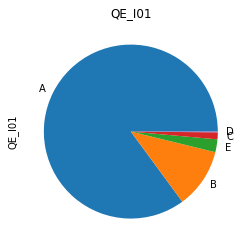

In [53]:
less_qtd_alunos_por_categoria('Notas','QE_I01')

In [9]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

NameError: name 'var_analisada' is not defined

In [69]:
var_analisada = 'QE_I08'
over_data = []
less_data = []

# Pega os indeces
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_order = over_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

#somas os indeces e armazena em um array
for i in over_order:
    total = over_5years[over_5years[var_analisada] == i]
    total = total[var_analisada].count()
    #print(str(i)+' '+str(total))
    over_data.append(total)
    
#Mesmos passos de cima, mas com os dados dos estudande que engressaram a menos de 5 anos
less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
print(less_opcoes_escolhidas[var_analisada].count())
less_order = less_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index
for i in less_order:
    total2 = less_5years[less_5years[var_analisada] == i]
    total2 = total2[var_analisada].count()
    #print(str(i)+' '+str(total2))
    less_data.append(total2)
#print(over_order)


59225


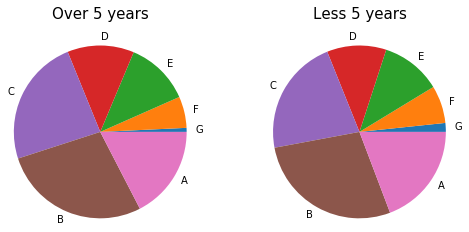

In [70]:
#alunos[var_analisada].value_counts().plot.pie(title=var_analisada)

fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(over_data, labels=over_order, radius = 1.5)
ax2 = fig.add_axes([.6, .0, .5, .5], aspect=1)
ax2.pie(less_data, labels=less_order, radius = 1.5)
ax1.set_title('Over 5 years\n\n', size='15')
ax2.set_title('Less 5 years\n\n', size='15')
plt.show()

,QE_I08,Notas
0,D,59.3
1,C,55.7
2,G,51.5
3,C,57.6
4,F,69.1


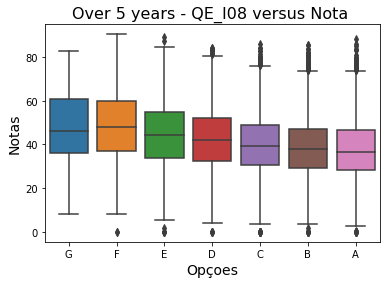

In [71]:
opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
bplot=sns.boxplot(x=var_analisada,y='Notas', data=opcoes_escolhidas,order=over_order)
bplot.axes.set_title('Over 5 years - '+str(var_analisada)+" versus Nota ",fontsize=16)
bplot.set_xlabel("Opçoes",fontsize=14)
bplot.set_ylabel("Notas",fontsize=14)
opcoes_escolhidas.head()


,QE_I08,Notas
0,C,42.8
1,E,60.9
2,D,25.0
3,E,42.4
4,F,40.0


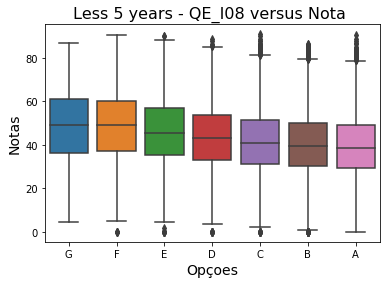

In [72]:
opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
bplot=sns.boxplot(x=var_analisada,y='Notas', data=less_opcoes_escolhidas,order=less_order)
bplot.axes.set_title('Less 5 years - '+str(var_analisada)+" versus Nota ",fontsize=16)
bplot.set_xlabel("Opçoes",fontsize=14)
bplot.set_ylabel("Notas",fontsize=14)
opcoes_escolhidas.head()